<h1>DBSCAN(Density Based Spatial Clustering of Applications with Noise)</h1><br>

밀도 기반 클러스터링의 대표적인 알고리즘. 데이터의 밀도 차이를 기반으로 하는 알고리즘. 데이터 특정 영역안에 얼마만큼에 데이터 포인트들이 들어와있는지 이런 밀도 차이를 계속 지속적으로 확장을 시켜가면서 밀도가 변하는 방향으로 계속 가는 것. 

복잡한 기하학 데이터를 가지고 있더라도 킅러스터링이 가능하며 자동으로 감지하여 군집을 생성하므로 사용자가 생성 불가. 

노이즈도 자동으로 빼버리므로 outlier를 detect하기도 함.

<img src="./img/DBSCAN1.png"/>


<h1>군집화 알고리즘별 비교</h1><br>

사이킷런의 클러스터링 사이트에 가보면 클러스터링을 비교한 페이지가 있는데 DBSCAN은 타원형 동그라미형 복잡한 기하학 구조를 가지는

데이터세트에도 잘 분할이 되고 있으나 반대로 MiniBatchKMeans는 복잡한 기하학 구조를 가지고 있으면 어렵고 가우시안믹스쳐는 길쭉한 것에 강하다.

DBSCAN의 치명적인 약점은 데이터 밀도가 너무 자주변한다는 것. 이런 경우는 아예 모든 데이터의 밀도가 변하지 않아 군집화하지 않고 통으로 하나 때려버린다.  

밀도가 끊어진 데이터를 노이즈로 처리하여 끊어버리기도 한다.

[사이킷런 사이트 바로가기](https://scikit-learn.org/stable/modules/clustering.html)

<img src="./img/ClusteringAlgorithm.png"/>

<h2>DBSCAN 구성요소</h2><br>

DBSCAN의 구성요소를 알아야 알고리즘이 직관적으로 이해가 된다.

그리 어렵지 않다. 일정 밀도 이상을 구성하는 그 흐름을 계속 쫓아가는 것임. 

Core포인트에서 입실론 반경에서 최소 데이터를 포함하고 있다면 그 해당포인트(코어포인트)의 갯수에 따라서 각각의 개별포인트들을 정하는 이름들이 있다.



<img src="./img/DBSCANElement1.png"/><br>

<img src="./img/DBSCANElement2.png"/><br>


<h2>DBSCAN 절차</h2><br>

<h3>절차 - 1</h3><br>



<img src="./img/DBSCANProcess1.png"/><br>


<h3>절차 - 2</h3><br>

<img src="./img/DBSCANProcess2.png"/><br>

<h3>절차 - 3</h3><br>

<img src="./img/DBSCANProcess3.png"/><br>

<h3>절차 - 4</h3><br>

<img src="./img/DBSCANProcess4.png"/><br>

<h3>절차 - 5</h3><br>

<img src="./img/DBSCANProcess5.png"/><br>

<h3>절차 - 6</h3><br>

<img src="./img/DBSCANProcess6.png"/><br>

<h3>절차 - 7</h3><br>

<img src="./img/DBSCANProcess7.png"/><br>



<h2>사이킷런 DBSCAN</h2><br>

사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원한다. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있다.

- eps: 입실론 주변 영역의 반경을 의미한다.

- min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미한다.(자신의 데이터를 포함한다. 위에서 설명한 min points + 1)

만약에 입실론 반경이 크고 min_samples가 적으면 굉장히 밀도가 작지만 그걸 군집화를 해주겠다는 것임. 어떻게 보면 군집화를 이렇게 컨트롤한다. 군집에 관한 범위 자체를 완화시키는 방식. 이 두개의 파라미터를 통해서 조절한다.

### DBSCAN 적용하기 – 붓꽃 데이터 셋

In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**eps 0.6 min_samples=8 로 DBSCAN 군집화 적용**

In [2]:
from sklearn.cluster import DBSCAN

# 입실론 반경안에 포함되어있는 거리측정은 metric='euclidean'(유클리디안)
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


위 결과를 그룹바이를 했다. 타겟별, dbscan_cluster로 벨류 카운터를 했다. -1은 노이즈이다. 어떤 클러스터에도 포함되지 않은 것.

클러스터는 0과 1이다. 두개의 클러스터만 됐다. 0은 세토사로 추정할 수 있다. 두개로 됐다고 나쁘다 이런게 아니라 아이리스 붓꽃 데이터세트를 보면 세토사는 명확하게 되는데 DBSCAN으로보면 나머지 두개는 어떤 것들은 노이즈로 빠지고 나머지는 전체가 하나의 클러스터로 묶였을 것임.

**이것을 visulaization해보자**

In [3]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

**PCA 2개 컴포넌트로 기존 feature들을 차원 축소 후 시각화**

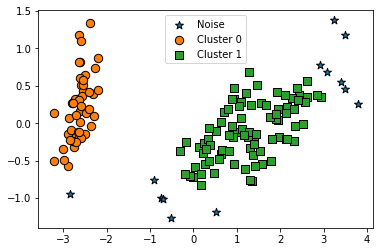

In [4]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

위 결과를 보면 별표 표시된것은 노이즈이다. 보는바와 같이 DBSCAN은 밀도 차이가 어느정도 있다고 한다면 이렇게 노이즈로 빼는 경우가 너무 많아진다. 그러므로 보통은 eps, min_samples를 조절해서 클러스터 범위를 조절해준다.

**eps의 크기를 증가 한 후 노이즈 확인**

늘어날까? 줄어들까?

당연히 줄어들 것임.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


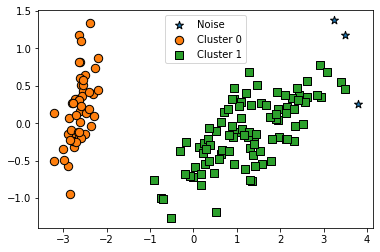

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


**min_samples의 크기를 증가 후 노이즈 확인**

반대로 노이즈가 증가할 것이다. 많은 친구들이 있어야 코어포인트의 자격이 생기므로.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


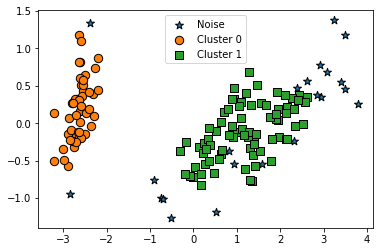

In [6]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 – make_circles() 데이터 세트

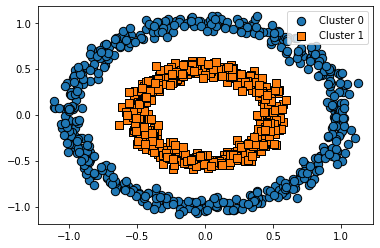

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


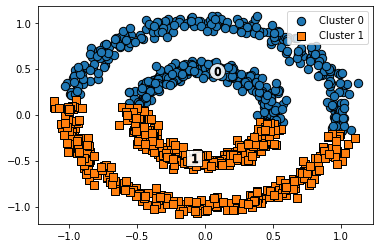

In [8]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


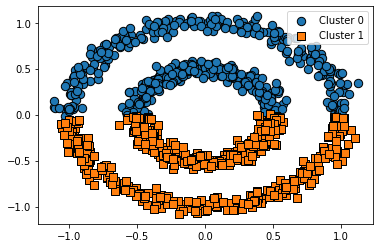

In [9]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


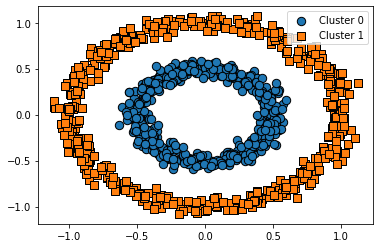

In [10]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
